## Iris Dataset Analysis

Today we are going to start into our data analysis and modeling using a very simple setup, we are going
to use the iris dataset and write our own k-NearestNeighbors to see if we can create associations between
the different flowers.

First thing, lets look at the data we load into our model.  

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os
import json

from pprint import pprint

data_dir = os.path.join('..', 'raw_data', 'iris')
dataset_filename = os.path.join(data_dir, 'iris_data.json')

with open(dataset_filename, 'r') as iris_file:
    iris_data = json.load(iris_file)
    
pprint(iris_data[:1])

[{'petal_length': 1.4,
  'petal_width': 0.2,
  'sepal_length': 5.1,
  'sepal_width': 3.5,
  'species': 'Iris-setosa'}]


## Data analysis

So in our dataset we have 4 features `sepal` width and length as well as the `pedal` width and length. 
We also have the label which is the `species` field.   

To start we are going to create a way to see associations using k-NearestNeighbors.  There are a couple of different
calculations, euclidean distance and manhattan that can be used for the calculation.  

For our first setup, lets create the k-Nearest function and allow it to take in the calculation to use
between two data points.  

In [3]:
def kNearestNeighbor(algorithm, dataset, point, k=5):
    nearest = []
    for i, data_point in enumerate(dataset):
        distance = abs(algorithm(point, data_point))
        nearest.append((distance, i, data_point))
    
    sorted_nearest = sorted(nearest, key=lambda x: x[0])
    if k:
        return sorted_nearest[:k]
    else:
        return sorted_nearest

So we have our KNN, lets implement the first algorithm which is the euclidean distance algorithm.

$$
\renewcommand{\vec}[1]{\mathbf{#1}}
d(\vec{p},\vec{q}) = \sqrt{\sum(p_n-q_n)^2}
$$

In [4]:
import math

def euclidean_distance(point_one, point_two):
    square_sum = sum([(p-q) ** 2 for p, q in zip(point_one, point_two)])
    return math.sqrt(square_sum)

And finally, lets convert our data and test out our nearest neighbor. 

In [5]:
data_points = [(d['petal_width'], d['petal_length']) for d in iris_data]

compare_point = data_points[0]
neighbors = kNearestNeighbor(euclidean_distance, data_points[1:], compare_point, k=10)
pprint(neighbors)

[(0.0, 0, (0.2, 1.4)),
 (0.0, 3, (0.2, 1.4)),
 (0.0, 7, (0.2, 1.4)),
 (0.0, 27, (0.2, 1.4)),
 (0.0, 32, (0.2, 1.4)),
 (0.0, 46, (0.2, 1.4)),
 (0.0, 48, (0.2, 1.4)),
 (0.09999999999999987, 1, (0.2, 1.3)),
 (0.09999999999999987, 35, (0.2, 1.3)),
 (0.09999999999999987, 37, (0.2, 1.3))]


Looking over the results, for just two features we see that there are a few points that have the same
features giving us a distance of 0.  Lets compare the results of the neighbors with the species. 

In [6]:
[(d[1], d[0], iris_data[d[1]]['species']) for d in neighbors]

[(0, 0.0, 'Iris-setosa'),
 (3, 0.0, 'Iris-setosa'),
 (7, 0.0, 'Iris-setosa'),
 (27, 0.0, 'Iris-setosa'),
 (32, 0.0, 'Iris-setosa'),
 (46, 0.0, 'Iris-setosa'),
 (48, 0.0, 'Iris-setosa'),
 (1, 0.09999999999999987, 'Iris-setosa'),
 (35, 0.09999999999999987, 'Iris-setosa'),
 (37, 0.09999999999999987, 'Iris-setosa')]

Looks like the neighbors using just the petal_width and pedal_length are all in the same species, but let's
get more neighbors.

In [7]:
neighbors = kNearestNeighbor(euclidean_distance, data_points[1:], compare_point, k=50)
[(d[1], d[0], iris_data[d[1]]['species']) for d in neighbors][40:]

[(19, 0.30000000000000004, 'Iris-setosa'),
 (12, 0.3162277660168378, 'Iris-setosa'),
 (17, 0.31622776601683794, 'Iris-setosa'),
 (4, 0.36055512754639896, 'Iris-setosa'),
 (21, 0.3999999999999999, 'Iris-setosa'),
 (22, 0.42426406871192857, 'Iris-setosa'),
 (42, 0.447213595499958, 'Iris-setosa'),
 (23, 0.5, 'Iris-setosa'),
 (43, 0.5385164807134505, 'Iris-setosa'),
 (97, 1.8357559750685821, 'Iris-versicolor')]

So, at 50 we finally have a neighbor that is not the same species.  Our first `Iris-versicolor`.  I'm curious
to see the results that we could get if our data_points were using all 4 features instead of just 2. 

In [8]:
data_points = [((d['petal_width'], d['petal_length'], d['sepal_length'], d['sepal_width']), d['species']) 
               for d in iris_data]

compare_point = data_points[0]
dataset = data_points[1:]
neighbors = kNearestNeighbor(euclidean_distance, [d[0] for d in dataset], compare_point[0], k=10)
print(compare_point)
[(d[1], d[0], iris_data[d[1]]['species'], d[2]) for d in neighbors]

((0.2, 1.4, 5.1, 3.5), 'Iris-setosa')


[(16, 0.09999999999999998, 'Iris-setosa', (0.3, 1.4, 5.1, 3.5)),
 (3, 0.1414213562373093, 'Iris-setosa', (0.2, 1.4, 5.0, 3.6)),
 (38, 0.14142135623730964, 'Iris-setosa', (0.2, 1.5, 5.1, 3.4)),
 (26, 0.14142135623730995, 'Iris-setosa', (0.2, 1.5, 5.2, 3.5)),
 (27, 0.14142135623730995, 'Iris-setosa', (0.2, 1.4, 5.2, 3.4)),
 (39, 0.17320508075688743, 'Iris-setosa', (0.3, 1.3, 5.0, 3.5)),
 (6, 0.17320508075688762, 'Iris-setosa', (0.2, 1.5, 5.0, 3.4)),
 (48, 0.22360679774997896, 'Iris-setosa', (0.2, 1.4, 5.0, 3.3)),
 (20, 0.30000000000000016, 'Iris-setosa', (0.4, 1.5, 5.1, 3.7)),
 (47, 0.30000000000000027, 'Iris-setosa', (0.2, 1.5, 5.3, 3.7))]

Lets see how the differences compare when using the manhattan algorithm.

$$
d(\vec{p},\vec{q}) = \sum{|p_n-q_n|}
$$

In [9]:
def manhattan_distance(point_one, point_two):
    return sum([abs(p-q) for p, q in zip(point_one, point_two)])

Now lets look at the data for manhattan distance. 

In [10]:
neighbors = kNearestNeighbor(manhattan_distance, [d[0] for d in dataset], compare_point[0], k=10)
print(compare_point)
[(d[1], d[0], iris_data[d[1]]['species'], d[2]) for d in neighbors]

((0.2, 1.4, 5.1, 3.5), 'Iris-setosa')


[(16, 0.09999999999999998, 'Iris-setosa', (0.3, 1.4, 5.1, 3.5)),
 (3, 0.19999999999999973, 'Iris-setosa', (0.2, 1.4, 5.0, 3.6)),
 (38, 0.20000000000000018, 'Iris-setosa', (0.2, 1.5, 5.1, 3.4)),
 (26, 0.20000000000000062, 'Iris-setosa', (0.2, 1.5, 5.2, 3.5)),
 (27, 0.20000000000000062, 'Iris-setosa', (0.2, 1.4, 5.2, 3.4)),
 (39, 0.2999999999999995, 'Iris-setosa', (0.3, 1.3, 5.0, 3.5)),
 (6, 0.2999999999999998, 'Iris-setosa', (0.2, 1.5, 5.0, 3.4)),
 (48, 0.2999999999999998, 'Iris-setosa', (0.2, 1.4, 5.0, 3.3)),
 (18, 0.4999999999999999, 'Iris-setosa', (0.3, 1.5, 5.1, 3.8)),
 (45, 0.5, 'Iris-setosa', (0.2, 1.6, 5.1, 3.8))]

Lets go ahead and do some plotting from one point to all other points using distance when compared to
each of the different features.

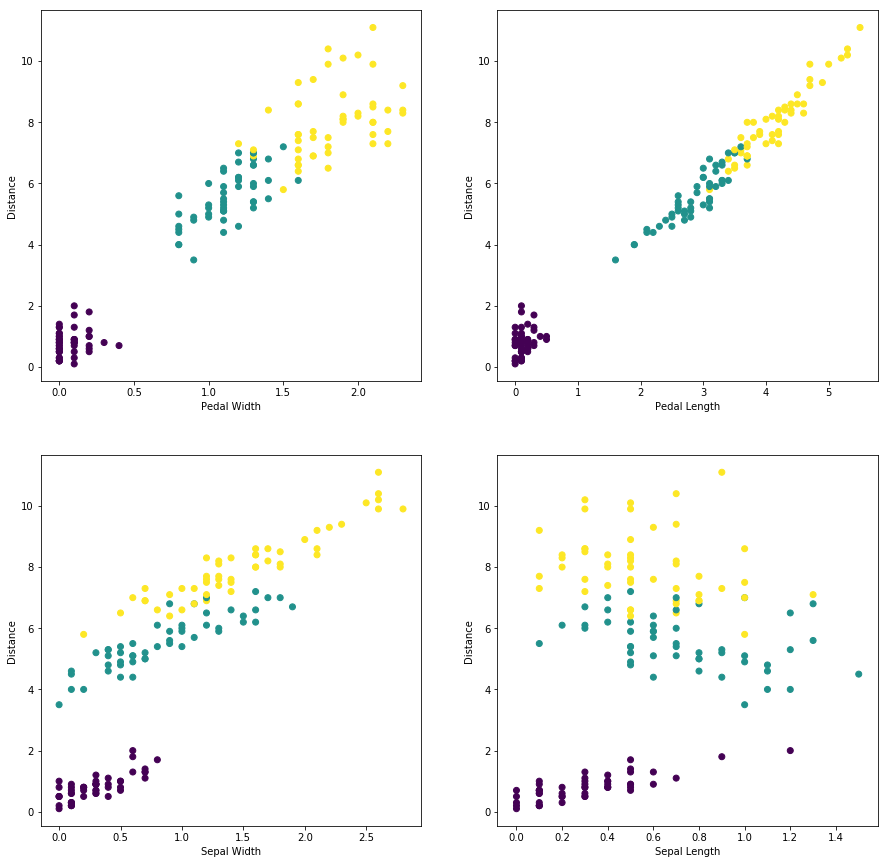

In [11]:
neighbors = kNearestNeighbor(manhattan_distance, [d[0] for d in dataset], compare_point[0], k=None)
neighbor_data = [(d[1], d[0], dataset[d[1]][1], d[2]) for d in neighbors]

label_index = list({d[2] for d in neighbor_data})
Y = [x[1] for x in neighbor_data]
plt_labels = [label_index.index(d[2]) for d in neighbor_data]

# fig, axs = plt.subplots(2,2)

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(15)

plt.tight_layout()
# Pedal Width
plt.subplot(2, 2, 1)
compare_x = compare_point[0][0]
X = [abs(x[3][0]-compare_x) for x in neighbor_data]
plt.ylabel('Distance')
plt.xlabel('Pedal Width')
plt.scatter(X, Y, c=plt_labels)

# Pedal Length
plt.subplot(2, 2, 2)
compare_x = compare_point[0][1]
X = [abs(x[3][1]-compare_x) for x in neighbor_data]
plt.ylabel('Distance')
plt.xlabel('Pedal Length')
plt.scatter(X, Y, c=plt_labels)

# Sepal Width
plt.subplot(2, 2, 3)
compare_x = compare_point[0][2]
X = [abs(x[3][2]-compare_x) for x in neighbor_data]
plt.ylabel('Distance')
plt.xlabel('Sepal Width')
plt.scatter(X, Y, c=plt_labels)

# Sepal Length
plt.subplot(2, 2, 4)
compare_x = compare_point[0][3]
X = [abs(x[3][3]-compare_x) for x in neighbor_data]
plt.ylabel('Distance')
plt.xlabel('Sepal Length')
plt.scatter(X, Y, c=plt_labels)
plt.show()

So looking over the data, it would appear that the pedal width and pedal length are the best representative
for class association given the selected point.  So what I would like to do next is create a model that uses
the KNN to predict the classification, and from there take the incorrect results and plot those points to see
how they compare.  

For our next step, lets take the code above and create a single function that will take a point, the dataset
and create the graph for us given that single point.  

In [12]:
def graph_features(dataset, label, compare_point, feature_names, use_abs=False, distance_algorithm=manhattan_distance):
    # Get the neighbors for the Dataset
    neighbors = kNearestNeighbor(distance_algorithm, dataset, compare_point, k=None)
    neighbor_data = [(d[1], d[0], label[d[1]], d[2]) for d in neighbors]

    # Get the Y axis (Distance)
    Y = [x[1] for x in neighbor_data]
    label_indexes = list(set(label))
    colors = ['red', 'blue', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
    labels = [label_indexes.index(d[2]) for d in neighbor_data]

    # Start the plotting by setting the size and configuration
    fig = plt.figure()
    fig.set_figwidth(15)
    fig.set_figheight(15)
    plt.tight_layout()

    def add_subplot(index, X, X_name):
        ax = plt.subplot(2, 2, index)
        plt.ylabel('Distance')
        plt.xlabel(f'{X_name} difference')
        all_plots = []
        for li, ul in enumerate(label_indexes):
            ul_Y = [y for i, y in enumerate(Y) if labels[i] == li]
            ul_X = [x for i, x in enumerate(X) if labels[i] == li]
            all_plots.append(plt.scatter(ul_X, ul_Y, color=colors[li]))
        ax.legend(all_plots, label_indexes, loc='upper center', 
                  bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
        
    adjust_func = abs if use_abs else lambda x: x
    
    # Add a subplot for each feature
    for i, name in enumerate(feature_names):
        compare_point_x = compare_point[i]
        X = [adjust_func(compare_point_x - x[3][i]) for x in neighbor_data]
        add_subplot(i+1, X, name)

    plt.show()
    
# feature_names = ['petal_width', 'petal_length', 'sepal_length', 'sepal_width']
# label_name = 'species'
# all_data = [([d[name] for name in point_names], d[label_name]) for d in iris_data]
# compare_point = all_data[0]
# train_data = [d[0] for d in all_data[1:]]
# labels = [d[1] for d in all_data[1:]]
# graph_features(train_data, labels, compare_point[0], point_names, distance_algorithm=euclidean_distance)

Alright, we have a new function that we can call easily with different values to see the differences.

At this point we are going to split our data into a train/validation set that we can use in the
next portion of taking this notebook, creating a model around the KNN. 

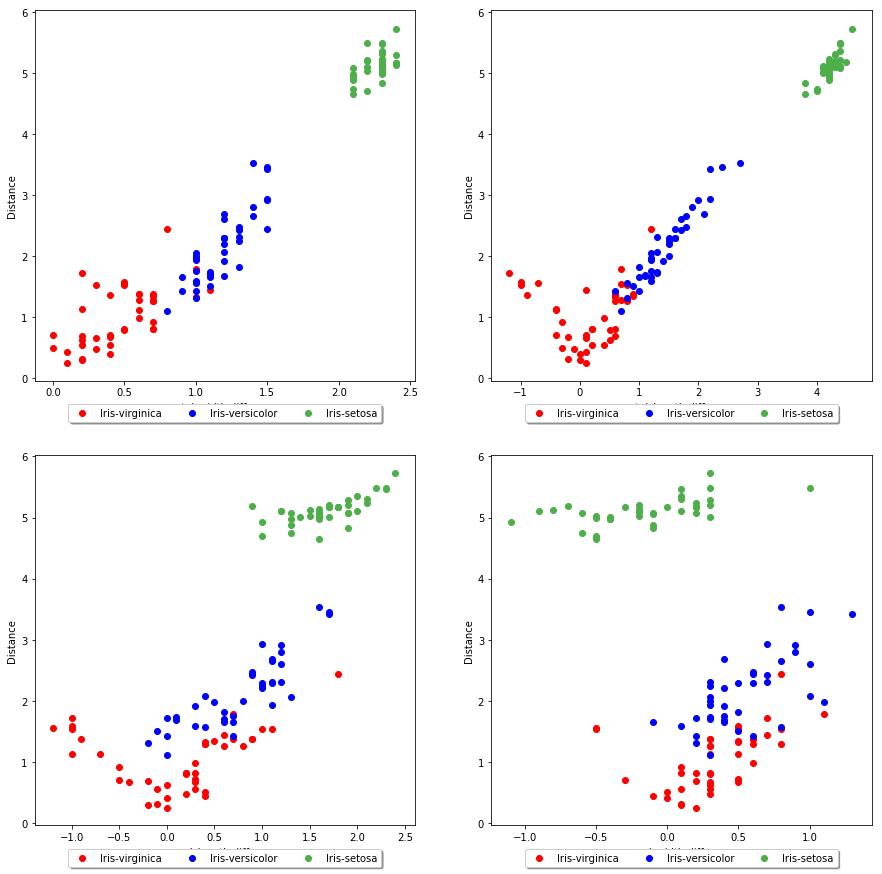

In [13]:
import random

# Set a fixed seed for reproducibility
random.seed(42)

holdout_percent = 0.2

feature_names = ['petal_width', 'petal_length', 'sepal_length', 'sepal_width']
label_name = 'species'

all_data = [([d[name] for name in feature_names], d[label_name]) for d in iris_data]

random.shuffle(all_data)

split_index = int(len(all_data) * (1-holdout_percent))
train_data = all_data[:split_index]
validation_data = all_data[split_index:]

train_features = [d[0] for d in train_data]
train_labels = [d[1] for d in train_data]

graph_features(train_features, train_labels, validation_data[0][0], feature_names, distance_algorithm=euclidean_distance)

Alright lets take our KNN and wrap it in a model, this model will have two steps.

1. Training (basically capture and hold onto the train set to do distance comparisons)
2. Prediction (calculating the distances and determining what the classification is)

In [14]:
import math

from pprint import pprint
from collections import Counter


class KNNModel:
    def euclidean(point_one, point_two):
        square_sum = sum([(p-q) ** 2 for p, q in zip(point_one, point_two)])
        return math.sqrt(square_sum)

    def manhattan(point_one, point_two):
        return sum([abs(p-q) for p, q in zip(point_one, point_two)])
    
    def max_labels(distance_labels):
        label_counter = Counter([d[1] for d in distance_labels])
        most_common = label_counter.most_common()[0]
        label_counts = len(distance_labels)
        return (most_common[0], most_common[1] / label_counts)

    def __init__(self, k=5, distance_algorithm='euclidean', weight_function=None, score_func='max_labels'):
        """    
        :param distance_algorithm: Either euclidean or manhattan
        :param weight_function: The weight function, takes a distance and returns an adjusted distance 
            that can be based on weight
        :param score_func: Options are max_labels...
        """
        self._k = k
        self._distance_algorithm = KNNModel.manhattan if 'manhattan' else KNNModel.euclidean
        self._label_selection = KNNModel.max_labels if score_func else None
        self._weight_func = weight_function
        self._train_vectors = None
        self._train_labels = None

    def fit(self, train_vectors, train_labels):
        """
        :param train_vectors: Sequence of Vectors[float] to be used in training
        :param train_labels: Sequence of label values (any type)
        """
        self._train_vectors = train_vectors
        self._train_labels = train_labels
    
    def predict(self, vector):
        neighbors = self._kNearestNeighbors(vector)

        labels = [self._train_labels[n[0]] for n in neighbors]
        updated_weights = [n[1] for n in neighbors]
        
        if self._weight_func:
            updated_weights = self._weight_func(updated_weights)
            
        return self._label_selection([(n[0], l) for n, l in zip(updated_weights, labels)])

    def _kNearestNeighbors(self, point):
        nearest = []
        for i, data_point in enumerate(self._train_vectors):
            distance = self._distance_algorithm(point, data_point)
            nearest.append((i, (distance, data_point)))

        sorted_nearest = sorted(nearest, key=lambda x: x[1][0])
        if self._k:
            return sorted_nearest[:self._k]
        else:
            return sorted_nearest


Ok, lets test out or model!

In [15]:
model = KNNModel()

model.fit(train_features, train_labels)

predicted = model.predict(validation_data[0][0])
actual_label = validation_data[0][1]
print(predicted, actual_label)

('Iris-virginica', 1.0) Iris-virginica


So, model looks good so far... at this point lets iterate through all our validation points
and check to see how accurate the model is.

0.9666666666666667
Predicted: ('Iris-virginica', 0.8) - Correct: Iris-versicolor


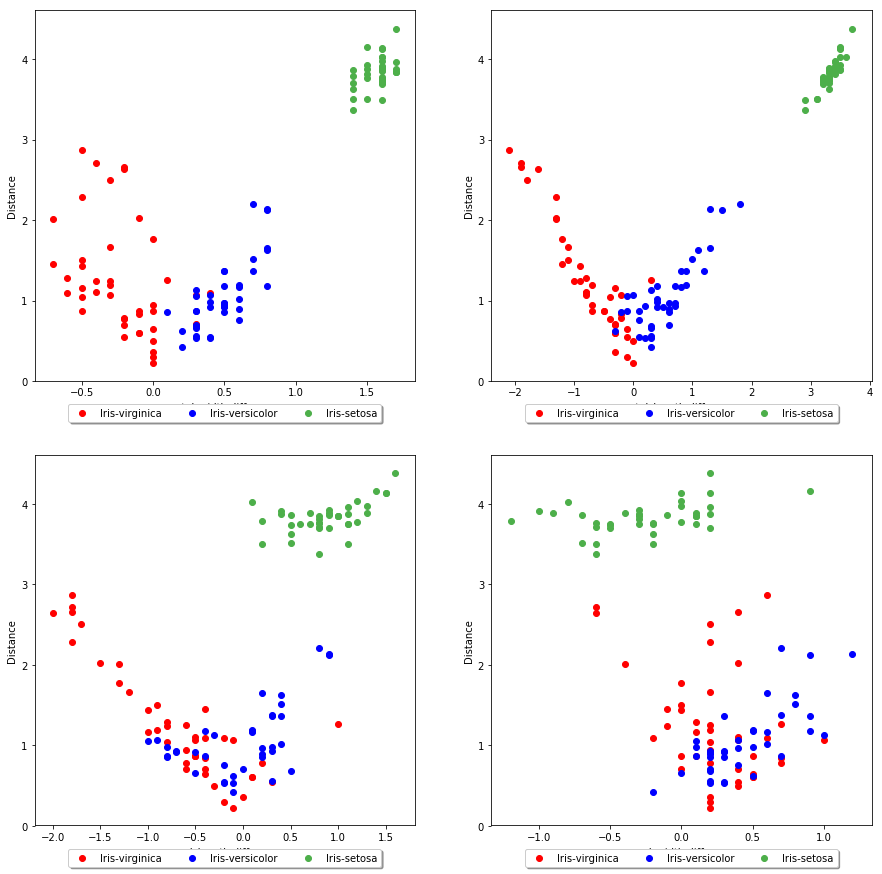

In [16]:
correct_labels = []
incorrect_labels = []

for i, v in enumerate(validation_data):
    result = model.predict(v[0])
    if result[0] == v[1]:
        correct_labels.append((i, result, v[1], v[0]))
    else:
        incorrect_labels.append((i, result, v[1], v[0]))
        
accuracy = len(correct_labels) / (len(correct_labels) + len(incorrect_labels))
print(accuracy)

# Lets display an invalid prediction
if len(incorrect_labels) < 0:
    print('No incorrect labels found')
else:
    incorrect_check = incorrect_labels[0]
    predicted = incorrect_check[1]
    correct = incorrect_check[2]
    print(f'Predicted: {predicted} - Correct: {correct}')
    graph_features(train_features, train_labels, incorrect_check[3], 
                   feature_names, use_abs=False, 
                   distance_algorithm=euclidean_distance)
